In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [2]:
# load dataset
dta = sm.datasets.fair.load_pandas().data

In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


1.0      41
2.0     859
3.0    2783
4.0    1834
5.0     740
6.0     109
Name: occupation, dtype: int64


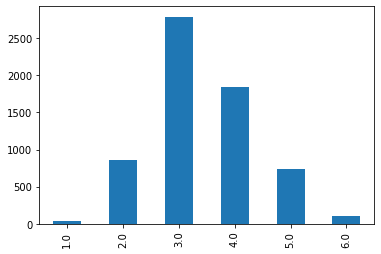

In [5]:
#occupation: woman's occupation 
'''
1 = student, 
2 = farming/semi-skilled/unskilled,
3 = "white collar",
4 = teacher/nurse/writer/technician/skilled,
5 = managerial/business,
6 = professional with advanced degree)
'''
print(dta['occupation'].value_counts().sort_index())
dta['occupation'].value_counts().sort_index().plot.bar()

1.0      99
2.0     348
3.0     993
4.0    2242
5.0    2684
Name: rate_marriage, dtype: int64


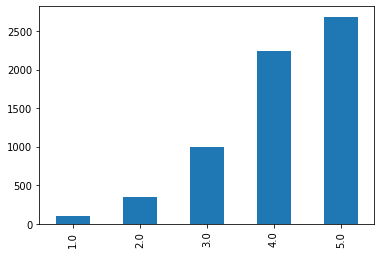

In [6]:
# rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
print(dta['rate_marriage'].value_counts().sort_index())
dta['rate_marriage'].value_counts().sort_index().plot.bar()

17.5     139
22.0    1800
27.0    1931
32.0    1069
37.0     634
42.0     793
Name: age, dtype: int64


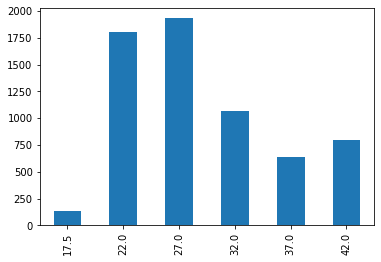

In [7]:
#age: woman's age
print(dta['age'].value_counts().sort_index())
dta['age'].value_counts().sort_index().plot.bar()

0.5      370
2.5     2034
6.0     1141
9.0      602
13.0     590
16.5     818
23.0     811
Name: yrs_married, dtype: int64


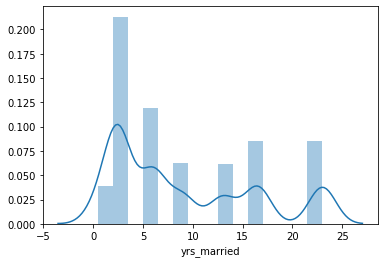

In [8]:
#yrs_married: number of years married
print(dta['yrs_married'].value_counts().sort_index())
sns.distplot(dta['yrs_married'])

0.0    2414
1.0    1159
2.0    1481
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64


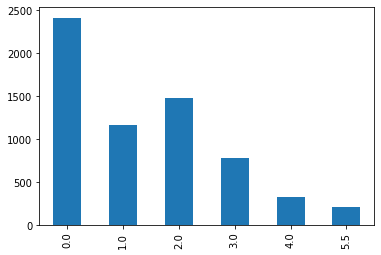

In [9]:
#children: number of children
print(dta['children'].value_counts().sort_index())
dta['children'].value_counts().sort_index().plot.bar()

1.0    1021
2.0    2267
3.0    2422
4.0     656
Name: religious, dtype: int64


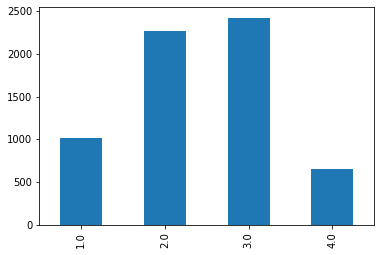

In [10]:
#religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
print(dta['religious'].value_counts().sort_index())
dta['religious'].value_counts().sort_index().plot.bar()

9.0       48
12.0    2084
14.0    2277
16.0    1117
17.0     510
20.0     330
Name: educ, dtype: int64


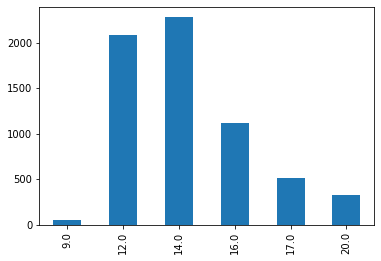

In [11]:
#educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
print(dta['educ'].value_counts().sort_index())
dta['educ'].value_counts().sort_index().plot.bar()

1.0      41
2.0     859
3.0    2783
4.0    1834
5.0     740
6.0     109
Name: occupation, dtype: int64


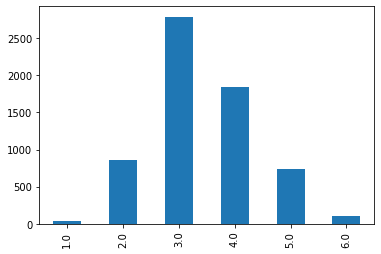

In [12]:
# occupation: woman's occupation 
'''
1 = student,
2 = farming/semi-skilled/unskilled,
3 = "white collar",
4 = teacher/nurse/writer/technician/skilled,
5 = managerial/business,
6 = professional with advanced degree
'''
print(dta['occupation'].value_counts().sort_index())
dta['occupation'].value_counts().sort_index().plot.bar()

1.0     229
2.0    1308
3.0     490
4.0    2030
5.0    1779
6.0     530
Name: occupation_husb, dtype: int64


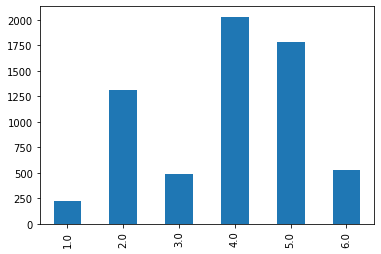

In [13]:
#occupation_husb: husband's occupation (same coding as above)
print(dta['occupation_husb'].value_counts().sort_index())
dta['occupation_husb'].value_counts().sort_index().plot.bar()

0    4313
1    2053
Name: affair, dtype: int64


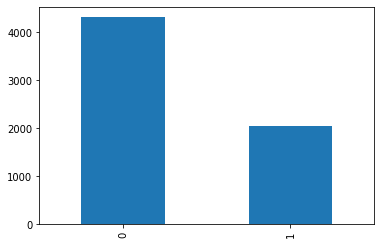

In [14]:
# affairs: time spent in extra-marital affairs
print(dta['affair'].value_counts().sort_index())
dta['affair'].value_counts().sort_index().plot.bar()

In [15]:
# not a heavy imbalance 2.1 : 1 is the ratio
dta['affair'].value_counts()[0]/dta['affair'].value_counts()[1]

2.100828056502679

In [16]:
dta.groupby(['affair']).mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [17]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


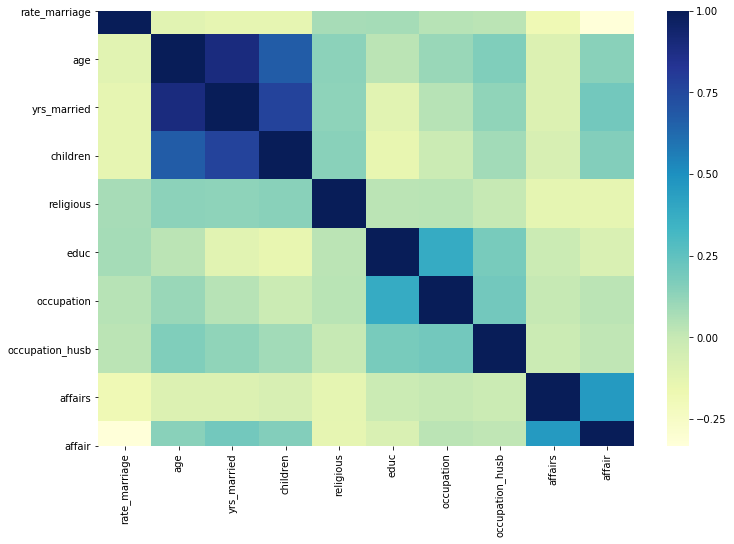

In [18]:
plt.figure(figsize=(12,8))
dta_corr = dta.corr()
sns.heatmap(dta_corr,cmap="YlGnBu")

In [19]:
i=0
corr_list=[]
for col in dta:
    if col != "affairs" and col != "affair":
        corr_list.append(dta[[col,'affairs']].corr().iloc[0][1])
        print(i)
        i+=1
corr_df = pd.DataFrame(corr_list,index=['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ','occupation', 'occupation_husb'])
corr_df

0
1
2
3
4
5
6
7


,0
rate_marriage,-0.178068
age,-0.089964
yrs_married,-0.087737
children,-0.070278
religious,-0.125933
educ,-0.017740
occupation,0.004469
occupation_husb,-0.015614


In [20]:
corr_df[corr_df[0]>-0.5]

,0
rate_marriage,-0.178068
age,-0.089964
yrs_married,-0.087737
children,-0.070278
religious,-0.125933
educ,-0.017740
occupation,0.004469
occupation_husb,-0.015614


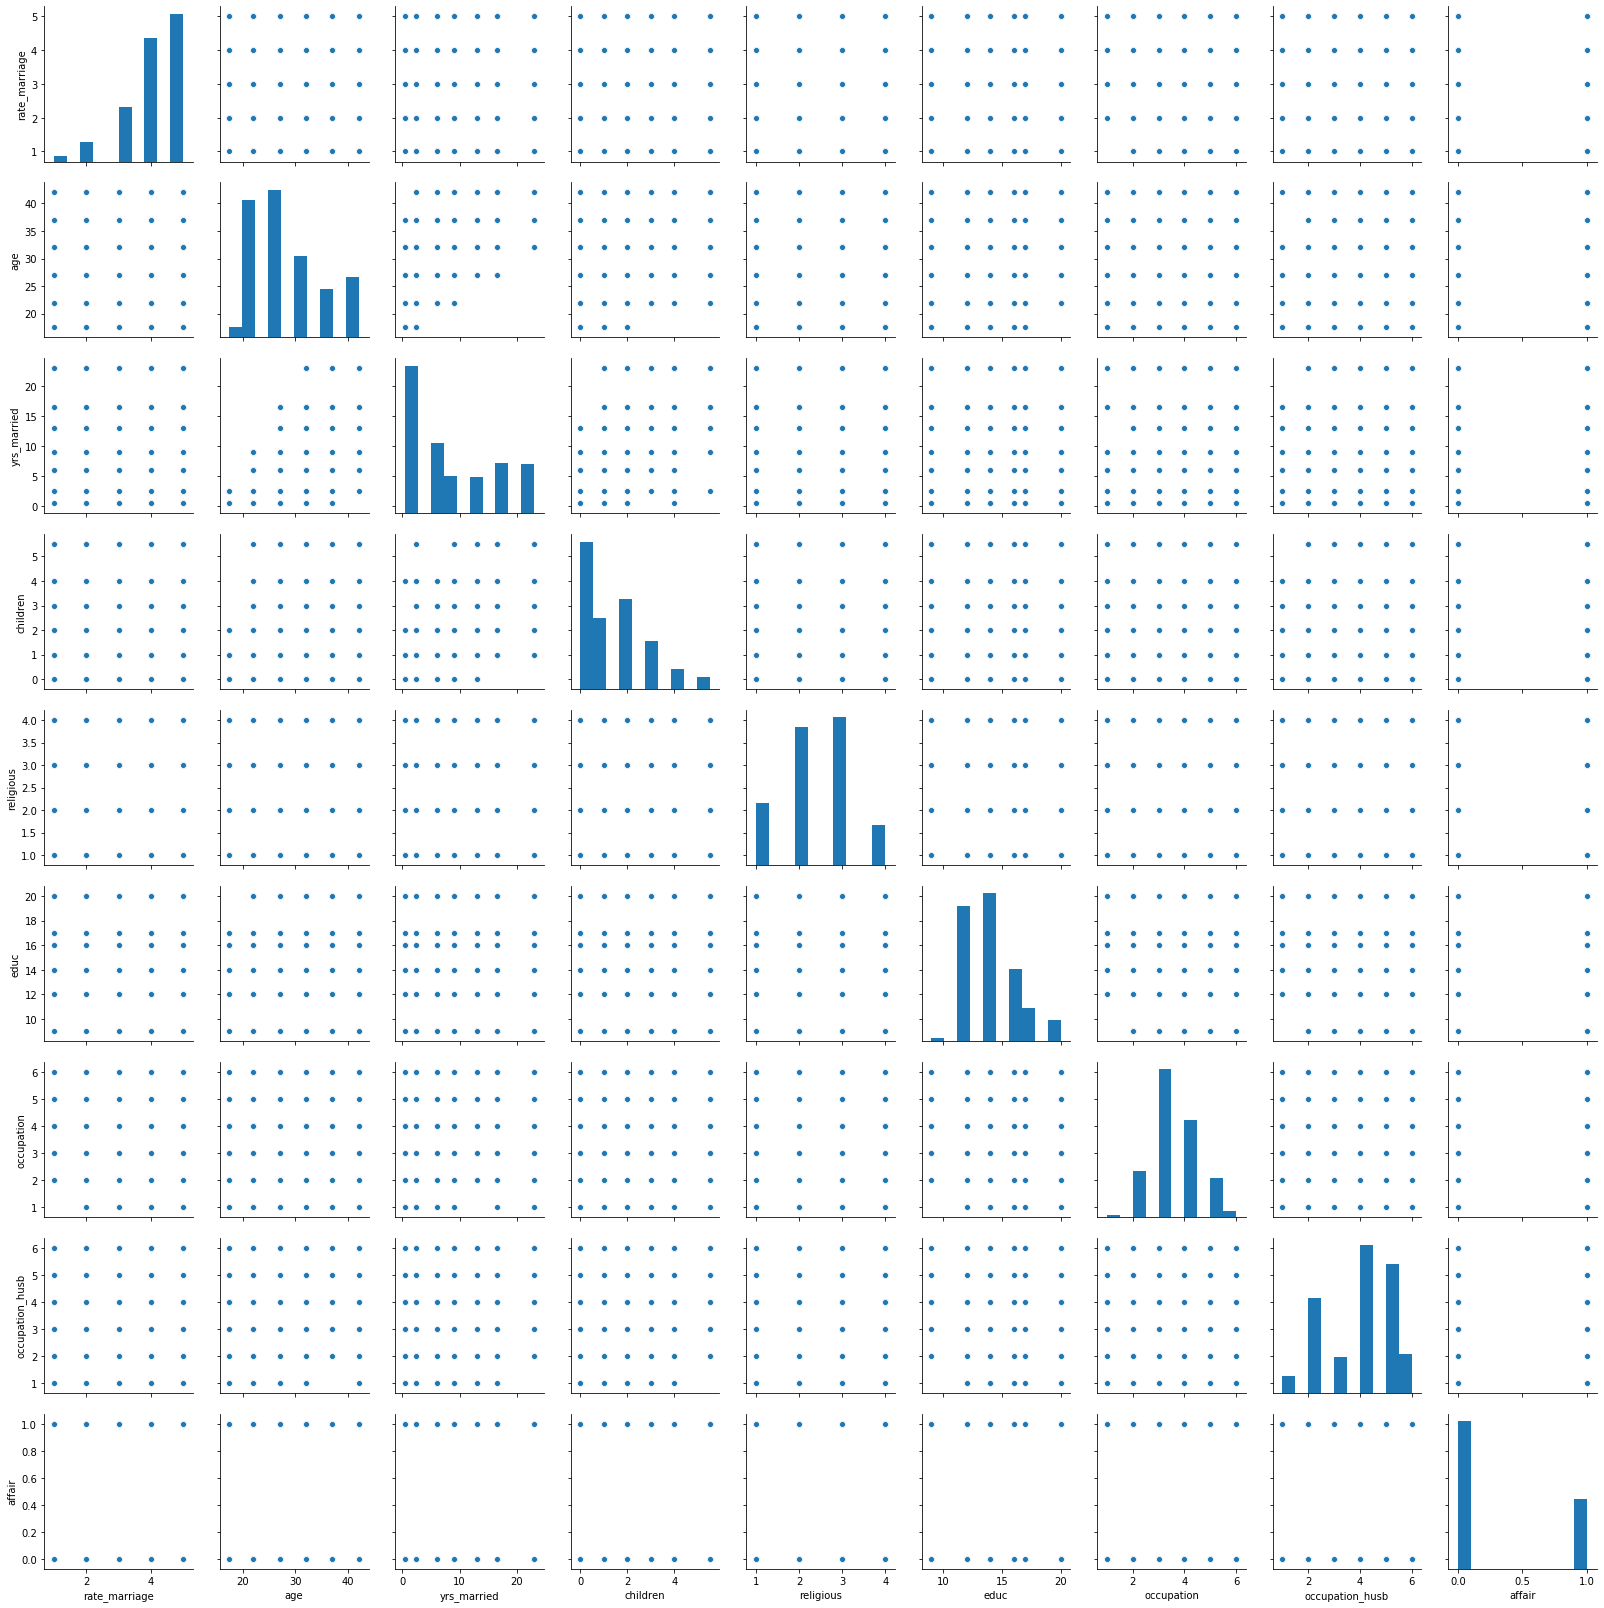

In [21]:
sns.pairplot(dta,vars = ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ','occupation', 'occupation_husb','affair'])

In [22]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
scaled_x=sc.fit_transform(X)

In [72]:
#scaled_y=sc.fit_transform(np.array(y).reshape(-1,1))

In [26]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,random_state=42,test_size=0.3,stratify=y)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4456, 17)
(1910, 17)
(4456,)
(1910,)


In [28]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFE

In [29]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num Features: 3
Selected Features: [False False False False False False False False False False False  True
  True  True False False False]
Feature Ranking: [15  4  6  5  3  7  8 12  9 14 11  1  1  1 10  2 13]


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklea

In [34]:
len(fit.support_)

17

In [41]:
y_train_pred_raw = fit.predict_proba(x_train)

In [53]:
y_train_pred=[]
for i in y_train_pred_raw[0:,0]:
    if i >= 0.5:
        y_train_pred.append(0)
    else:
        y_train_pred.append(1)
y_train_pred

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [54]:
y_train

array([0., 1., 1., ..., 0., 0., 0.])

In [61]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [62]:
confusion_matrix(y_train,y_train_pred)

array([[2777,  242],
       [ 995,  442]], dtype=int64)

In [63]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82      3019
         1.0       0.65      0.31      0.42      1437

    accuracy                           0.72      4456
   macro avg       0.69      0.61      0.62      4456
weighted avg       0.71      0.72      0.69      4456



In [64]:
accuracy_score(y_train,y_train_pred)

0.7223967684021544

In [70]:
y_test_pred_raw = fit.predict_proba(x_test)
for i in y_test_pred_raw:
    print(i)

[0.8892316 0.1107684]
[0.76849485 0.23150515]
[0.8892316 0.1107684]
[0.43704352 0.56295648]
[0.73272132 0.26727868]
[0.72051414 0.27948586]
[0.6926605 0.3073395]
[0.33457854 0.66542146]
[0.6926605 0.3073395]
[0.6926605 0.3073395]
[0.84484448 0.15515552]
[0.56282931 0.43717069]
[0.37679641 0.62320359]
[0.73272132 0.26727868]
[0.79035976 0.20964024]
[0.84590454 0.15409546]
[0.56282931 0.43717069]
[0.46818571 0.53181429]
[0.65212467 0.34787533]
[0.54765303 0.45234697]
[0.84496855 0.15503145]
[0.87883929 0.12116071]
[0.73272132 0.26727868]
[0.84590454 0.15409546]
[0.8537467 0.1462533]
[0.6237442 0.3762558]
[0.8537467 0.1462533]
[0.72051414 0.27948586]
[0.68750145 0.31249855]
[0.8537467 0.1462533]
[0.46640267 0.53359733]
[0.72051414 0.27948586]
[0.93820579 0.06179421]
[0.73272132 0.26727868]
[0.8537467 0.1462533]
[0.34741264 0.65258736]
[0.73272132 0.26727868]
[0.26548023 0.73451977]
[0.79035976 0.20964024]
[0.8537467 0.1462533]
[0.77999463 0.22000537]
[0.56282931 0.43717069]
[0.8537467 0.1

[0.72051414 0.27948586]
[0.33202182 0.66797818]
[0.79035976 0.20964024]
[0.46640267 0.53359733]
[0.76849485 0.23150515]
[0.8537467 0.1462533]
[0.8537467 0.1462533]
[0.87883929 0.12116071]
[0.72051414 0.27948586]
[0.8892316 0.1107684]
[0.42267299 0.57732701]
[0.37679641 0.62320359]
[0.65049796 0.34950204]
[0.56282931 0.43717069]
[0.33202182 0.66797818]
[0.8537467 0.1462533]
[0.81419996 0.18580004]
[0.18925232 0.81074768]
[0.84590454 0.15409546]
[0.6237442 0.3762558]
[0.6926605 0.3073395]
[0.8892316 0.1107684]
[0.56282931 0.43717069]
[0.65049796 0.34950204]
[0.56282931 0.43717069]
[0.37679641 0.62320359]
[0.65049796 0.34950204]
[0.14510793 0.85489207]
[0.84590454 0.15409546]
[0.79851675 0.20148325]
[0.54657691 0.45342309]
[0.8892316 0.1107684]
[0.6926605 0.3073395]
[0.8537467 0.1462533]
[0.6237442 0.3762558]
[0.3624772 0.6375228]
[0.56282931 0.43717069]
[0.50170292 0.49829708]
[0.18925232 0.81074768]
[0.54765303 0.45234697]
[0.84590454 0.15409546]
[0.51418771 0.48581229]
[0.14654108 0.85

In [71]:
y_test_pred=[]
for i in y_test_pred_raw[0:,0]:
    if i >= 0.5:
        y_test_pred.append(0)
    else:
        y_test_pred.append(1)
y_test_pred

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [72]:
confusion_matrix(y_test,y_test_pred)

array([[1163,  131],
       [ 420,  196]], dtype=int64)

In [74]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.90      0.81      1294
         1.0       0.60      0.32      0.42       616

    accuracy                           0.71      1910
   macro avg       0.67      0.61      0.61      1910
weighted avg       0.69      0.71      0.68      1910



In [75]:
accuracy_score(y_test,y_test_pred)

0.7115183246073299

In [100]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklea

[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
0.7241630685514876


In [103]:
test_sample = sc.fit_transform(np.array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4, 16]).reshape(1, -1))
test_sample.shape

(1, 17)

In [104]:
fit.predict_proba(test_sample)

array([[0.69758123, 0.30241877]])